In [2]:
import numpy as np
import matplotlib.pyplot as plt
from util import readAngles, readSinogram, saveImage
### TOUT REMETTRE DANS RECONSTRUCTION À LA FIN ###
from reconstruction_copie import laminogram, backproject, backproject_interpol
import math
import geometry as geo
import util as util

### Question 6

In [25]:
def reconFourierSlice(sinogram, angles):

    # Initialiser la matrice des FFT de chaque projection
    proj_ft = np.zeros((sinogram[0],sinogram[1]), 'complex')
    tf_2d = np.zeros((sinogram[0],sinogram[1]), 'complex')
    # image = np.zeros((a,b), 'complex')
    
    # Boucler sur les projections et faire la FFT de chacune
    k = -1
    for projection in sinogram[2]:
        k += 1
        F = np.fft.fft(projection)

        proj_ft[k,:] = F

    for i in range(sinogram[0]): # lignes
        print(f"Computing 2d TF line {i+1}/{sinogram[0]}")
        for j in range(sinogram[1]): # colonnes
            theta = np.arctan2(j, i)
    return proj_ft, tf_2d

IndentationError: expected an indented block (<ipython-input-25-593cc59346df>, line 20)

working on image column: 1/96
working on image column: 2/96
working on image column: 3/96
working on image column: 4/96
working on image column: 5/96
working on image column: 6/96
working on image column: 7/96
working on image column: 8/96
working on image column: 9/96
working on image column: 10/96
working on image column: 11/96
working on image column: 12/96
working on image column: 13/96
working on image column: 14/96
working on image column: 15/96
working on image column: 16/96
working on image column: 17/96
working on image column: 18/96
working on image column: 19/96
working on image column: 20/96
working on image column: 21/96
working on image column: 22/96
working on image column: 23/96
working on image column: 24/96
working on image column: 25/96
working on image column: 26/96
working on image column: 27/96
working on image column: 28/96
working on image column: 29/96
working on image column: 30/96
working on image column: 31/96
working on image column: 32/96
working on image 

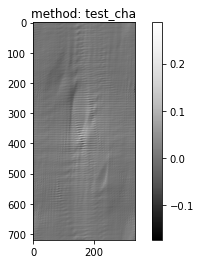

In [24]:
sinogram = readSinogram("data/sinogram-patient.txt")
angles = readAngles("data/angles.txt")[1]

proj_ft, tf_2d = reconFourierSlice(sinogram, angles)
# print(proj_ft[0])
im = np.real(np.fft.ifft2(tf_2d))
util.saveImage(im, "test_cha")



In [10]:
sinogram = readSinogram("data/sinogram-patient.txt")[2]
angles = readAngles("data/angles.txt")[1]

def closest_value(liste, valeur):

    liste = np.asarray(liste)
    liste_mod = liste - valeur
    indice = liste_mod.index(min(abs(liste_mod)))

    if liste_mod[indice] > 0:
        sup = True
    elif liste_mod[indice] < 0:
        sup = False

    return indice, sup


# On fait la FFT de chaque projection et on les stocke dans sino_fft
sino_fft = []
for projection in sinogram:
    fft_proj = np.fft.ifftshift(np.fft.fft(np.fft.fftshift(projection)))
    sino_fft.append(fft_proj)

# On génère une liste de fréquences spatiales pour les projections, longueur = nbpix et timestep = pixsize
freq_proj = np.fft.fftshift(np.fft.fftfreq(geo.nbpix, geo.pixsize))

# On génère une liste de fréquences spatiales pour l'image, longueur = nbvox et timestep = voxsize
freq_im = np.fft.fftshift(np.fft.fftfreq(geo.nbvox, geo.voxsize))

# On boucle maintenant sur tous les éléments de l'array de l'image dans le domaine de Fourier

im_fft = np.zeros((geo.nbpix, geo.nbpix), 'complex')

for i in range(geo.nbpix):
    for j in range(geo.nbpix):
        # On commence par associer à chaque pixel un indice par rapport au centre de l'array
        centre = geo.nbpix/2
        i_rel = i-centre
        j_rel = j-centre

        # On trouve l'angle du pixel par rapport à l'axe des abscisses positif du nouveau centre
        angle_pix = np.arctan2(j_rel, i_rel)

        # On trouve l'indice de la projection la plus proche de l'angle obtenu (plus proche voisin)
        liste_angles = angles - angle_pix
        indice = liste_angles.index(min(abs(liste_angles)))

        # On sélectionne aussi l'angle pi plus loin, car sa projection passe aussi par le pixel

        angle2_pix = angle_pix + np.pi
        if angle2_pix > 2*np.pi:
            angle2_pix -= 2*np.pi

        liste_angles = angles - angle2_pix
        indice2 = liste_angles.index(min(abs(liste_angles)))

        # Sélectionner les projections appropriée
        proj = sino_fft[indice]
        proj2 = sino_fft[indice2]

        # À partir de la position du pixel, on trouve sa fréquence spatiale en x et en y et on calcule la distance radiale en fréquence spatiale
        freq_x = freq_im[j]
        freq_y = freq_im[i]
        freq_r = np.sqrt(freq_x**2 + freq_y**2)

        index, sup = closest_value(freq_proj, freq_r)
        if sup is True:
            valeur = 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
